In [4]:
import sys
sys.path.append('../')

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from nn.sdnn import DNN

In [6]:
# https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data
data = np.genfromtxt('data/breast-cancer-wisconsin.data.txt', delimiter=',')
data.shape

(699, 11)

In [7]:
data = data[~np.isnan(data).any(axis=1)] # drop nans
data = data[:, 1:]                       # drop the id field
data.shape

(683, 10)

In [8]:
X = data[:, 0:-1]
y = data[:, -1:] # 2 or 4
X.shape, y.shape

((683, 9), (683, 1))

In [9]:
X[1]

array([ 5.,  4.,  4.,  5.,  7., 10.,  3.,  2.,  1.])

In [10]:
y = np.zeros([len(data), 2])
for i in range(0, len(data)):
    if data[i, -1] == 2:
        y[i, 0] = 0
        y[i, 1] = 1
    else:
        y[i, 0] = 1
        y[i, 1] = 0

In [11]:
X = preprocessing.normalize(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [13]:
X_train[:3]

array([[0.26286477, 0.43810795, 0.08762159, 0.35048636, 0.43810795,
        0.08762159, 0.30667557, 0.35048636, 0.43810795],
       [0.67082039, 0.2236068 , 0.2236068 , 0.2236068 , 0.4472136 ,
        0.2236068 , 0.2236068 , 0.2236068 , 0.2236068 ],
       [0.76980036, 0.19245009, 0.19245009, 0.19245009, 0.38490018,
        0.19245009, 0.19245009, 0.19245009, 0.19245009]])

In [14]:
X.shape, y.shape

((683, 9), (683, 2))

In [15]:
N = DNN(shape=[9, 15, 19, 2])
N.train(X_train, y_train)

         Current function value: 0.027309
         Iterations: 200
         Function evaluations: 203
         Gradient evaluations: 203


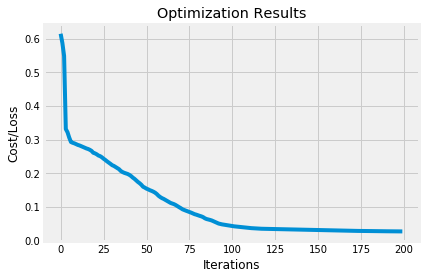

In [16]:
N.plot_cost()

In [17]:
N.compute_accuracy(X_test, y_test)

0.9203539823008849

In [18]:
N2 = DNN(shape=[9, 25, 35, 8, 2])
N2.train(X_train, y_train)

         Current function value: 0.017105
         Iterations: 200
         Function evaluations: 215
         Gradient evaluations: 215


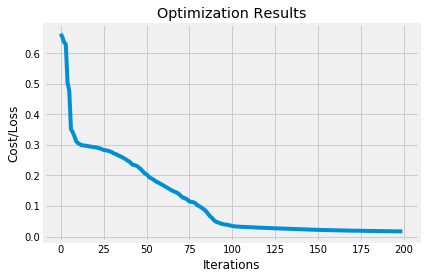

In [19]:
N2.plot_cost()

In [20]:
N2.compute_accuracy(X_test, y_test)

0.8893805309734514

In [21]:
# compare with sklearns implementation
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 19), random_state=1)

In [22]:
ymlp_train = y_train.argmax(axis=1)
ymlp_test = y_test.argmax(axis=1)

ymlp_train[:3], ymlp_test[:3]

(array([0, 1, 1], dtype=int64), array([0, 0, 0], dtype=int64))

In [23]:
clf.fit(X_train, ymlp_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15, 19), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [24]:
accuracy_score(ymlp_test, clf.predict(X_test)), N.compute_accuracy(X_test, y_test)

(0.8938053097345132, 0.9203539823008849)

In [25]:
np.round(clf.predict_proba(X_test), 3)[:10]

array([[0.801, 0.199],
       [0.635, 0.365],
       [0.981, 0.019],
       [0.002, 0.998],
       [0.105, 0.895],
       [0.26 , 0.74 ],
       [0.966, 0.034],
       [0.912, 0.088],
       [0.058, 0.942],
       [0.015, 0.985]])

In [26]:
np.round(N.y_hat, 2)[:10]

array([[0.97, 0.03],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ]])

In [27]:
np.round(clf.coefs_[0], 2)

array([[-0.08,  1.42, -1.08, -0.6 , -1.61, -0.44, -0.86, -0.15, -0.1 ,
         0.04, -1.46,  0.13, -0.85,  2.19, -0.47],
       [ 0.17, -1.36, -0.7 , -0.73,  1.46,  0.23,  1.17, -0.19,  0.19,
         0.38, -1.02, -0.46,  2.24, -1.38,  0.38],
       [-0.4 ,  0.76, -0.28, -0.41,  1.57, -0.23,  1.34,  0.33, -0.48,
         0.25, -0.94,  0.21,  2.13,  1.1 , -0.4 ],
       [-0.05,  0.67, -0.67, -0.44, -1.12, -0.54, -0.62, -0.29, -0.23,
        -0.01, -1.03,  0.02,  0.09,  1.06,  0.2 ],
       [-0.4 , -0.13, -0.28, -0.38, -2.04, -0.03,  0.73,  0.01,  0.44,
         0.09, -0.18, -0.43, -1.44,  0.16, -0.1 ],
       [-0.33, -1.65, -0.62, -0.04,  1.07,  0.25,  0.92,  0.25, -0.15,
        -0.23, -1.26, -0.14,  4.48, -1.44,  0.12],
       [-0.39,  2.4 , -0.59, -0.36,  1.4 , -0.33,  1.98,  0.07, -0.5 ,
         0.12, -1.1 , -0.01, -1.43,  2.01,  0.41],
       [ 0.12,  1.44, -0.52, -0.24,  0.6 , -0.34, -0.12,  0.43,  0.2 ,
        -0.43, -1.06,  0.21,  1.99,  1.09, -0.38],
       [-0.48, -1.07, -0

In [28]:
np.round(N.Ws[0], 2)

array([[ 1.16,  1.18,  0.03,  1.65, -0.15,  1.29,  0.01, -1.46,  1.73,
         1.27, -0.26,  1.2 ,  2.  , -0.06,  1.17],
       [-0.59,  0.61, -0.11,  0.4 , -1.34, -1.13, -0.16, -0.33, -0.26,
         2.2 , -0.91, -0.02, -1.18,  2.  ,  0.97],
       [-0.02,  1.24, -0.31, -2.81,  0.16, -0.19,  0.11,  0.81, -0.03,
         0.56, -0.75, -1.62, -0.39,  0.35, -0.27],
       [ 0.81, -0.44,  0.13,  0.2 , -0.3 , -2.93, -0.44,  0.86, -1.82,
         0.66, -1.08, -0.45,  0.35,  1.04, -0.25],
       [-0.4 , -0.16, -0.34, -3.73,  0.38,  0.5 , -1.69,  0.91,  0.45,
         0.09,  1.54, -0.39,  0.49, -1.36,  0.14],
       [-0.63, -1.86, -0.2 ,  0.99, -0.88, -0.51,  4.05,  0.4 , -1.36,
         0.52, -0.13,  2.17, -0.16, -1.78,  0.22],
       [ 0.19, -0.23, -0.04,  0.96,  0.95,  0.95, -0.33,  1.87, -1.63,
         0.85, -0.11, -2.68, -0.9 ,  0.83, -0.58],
       [ 0.68,  0.23, -0.26,  0.06,  0.71,  0.49, -0.17, -0.77,  2.83,
        -0.82,  1.21,  0.9 , -0.44,  0.76,  0.21],
       [ 0.56, -0.63,  0